## Full-finetuning grid search

Now that the dataset is downloaded, I'll update the code to use the correct file path.

Total available samples: 19675
Using 8000 samples for training
Train size: 6400, Test size: 1600
Tokenizing datasets...


Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda

Starting Hyperparameter Grid Search
Total combinations to try: 8
Estimated time: ~120 minutes on GPU


Combination 1/8: LR=2e-05, WD=0.01, Dropout=0.3
  Training started...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.502100,0.474184,0.883750,0.984334,0.870670,0.924020
2,0.478200,0.474115,0.900000,0.980591,0.894534,0.935588
3,0.439000,0.471052,0.916875,0.977869,0.918399,0.947201



✓ Results:
  - Eval Loss: 0.4711
  - Eval Accuracy: 0.9169
  - Eval F1: 0.9472
  - Overfitting Gap: 0.0000

Combination 2/8: LR=2e-05, WD=0.01, Dropout=0.4


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  Training started...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.518100,0.496824,0.863125,0.985612,0.843726,0.909166
2,0.489000,0.484182,0.885000,0.986900,0.869900,0.924714
3,0.450200,0.477771,0.901250,0.983885,0.892995,0.936239


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✓ Results:
  - Eval Loss: 0.4778
  - Eval Accuracy: 0.9012
  - Eval F1: 0.9362
  - Overfitting Gap: 0.0000

Combination 3/8: LR=2e-05, WD=0.05, Dropout=0.3
  Training started...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.505400,0.481295,0.864375,0.991818,0.839877,0.909546
2,0.484200,0.476802,0.904375,0.982323,0.898383,0.938480
3,0.431300,0.477152,0.916250,0.977068,0.918399,0.946825


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✓ Results:
  - Eval Loss: 0.4768
  - Eval Accuracy: 0.9044
  - Eval F1: 0.9385
  - Overfitting Gap: 0.0000

Combination 4/8: LR=2e-05, WD=0.05, Dropout=0.4
  Training started...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.514800,0.496000,0.863750,0.983885,0.846035,0.909768
2,0.490400,0.483077,0.884375,0.985192,0.870670,0.924397
3,0.450100,0.475983,0.903125,0.983926,0.895304,0.937525


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✓ Results:
  - Eval Loss: 0.4760
  - Eval Accuracy: 0.9031
  - Eval F1: 0.9375
  - Overfitting Gap: 0.0000

Combination 5/8: LR=3e-05, WD=0.01, Dropout=0.3
  Training started...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.511400,0.470114,0.879375,0.986796,0.862972,0.920739
2,0.483600,0.473757,0.906875,0.980769,0.903002,0.940281
3,0.429000,0.477450,0.919375,0.975610,0.923788,0.948992


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✓ Results:
  - Eval Loss: 0.4701
  - Eval Accuracy: 0.8794
  - Eval F1: 0.9207
  - Overfitting Gap: 0.0000

Combination 6/8: LR=3e-05, WD=0.01, Dropout=0.4
  Training started...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.533200,0.481150,0.885625,0.984375,0.872979,0.925337
2,0.493600,0.486152,0.888750,0.985281,0.876059,0.927465
3,0.442200,0.479807,0.903750,0.981497,0.898383,0.938103


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✓ Results:
  - Eval Loss: 0.4798
  - Eval Accuracy: 0.9038
  - Eval F1: 0.9381
  - Overfitting Gap: 0.0000

Combination 7/8: LR=3e-05, WD=0.05, Dropout=0.3
  Training started...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.511400,0.471622,0.881250,0.985977,0.866051,0.922131
2,0.482500,0.473602,0.906250,0.980753,0.902232,0.939856
3,0.428900,0.477368,0.918125,0.974797,0.923018,0.948201


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✓ Results:
  - Eval Loss: 0.4716
  - Eval Accuracy: 0.8812
  - Eval F1: 0.9221
  - Overfitting Gap: 0.0000

Combination 8/8: LR=3e-05, WD=0.05, Dropout=0.4
  Training started...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.524800,0.489094,0.871875,0.981514,0.858353,0.915811
2,0.489100,0.488627,0.891250,0.984496,0.879908,0.929268
3,0.441700,0.478119,0.901875,0.983080,0.894534,0.936719



✓ Results:
  - Eval Loss: 0.4781
  - Eval Accuracy: 0.9019
  - Eval F1: 0.9367
  - Overfitting Gap: 0.0000

Grid Search Results - 8/8 successful
 learning_rate  weight_decay  dropout  eval_loss  eval_accuracy  eval_f1  eval_precision  eval_recall  min_eval_loss  overfitting_gap
       0.00003          0.01      0.3   0.470114       0.879375 0.920739        0.986796     0.862972       0.470114              0.0
       0.00002          0.01      0.3   0.471052       0.916875 0.947201        0.977869     0.918399       0.471052              0.0
       0.00003          0.05      0.3   0.471622       0.881250 0.922131        0.985977     0.866051       0.471622              0.0
       0.00002          0.05      0.4   0.475983       0.903125 0.937525        0.983926     0.895304       0.475983              0.0
       0.00002          0.05      0.3   0.476802       0.904375 0.938480        0.982323     0.898383       0.476802              0.0
       0.00002          0.01      0.4   0.477771  

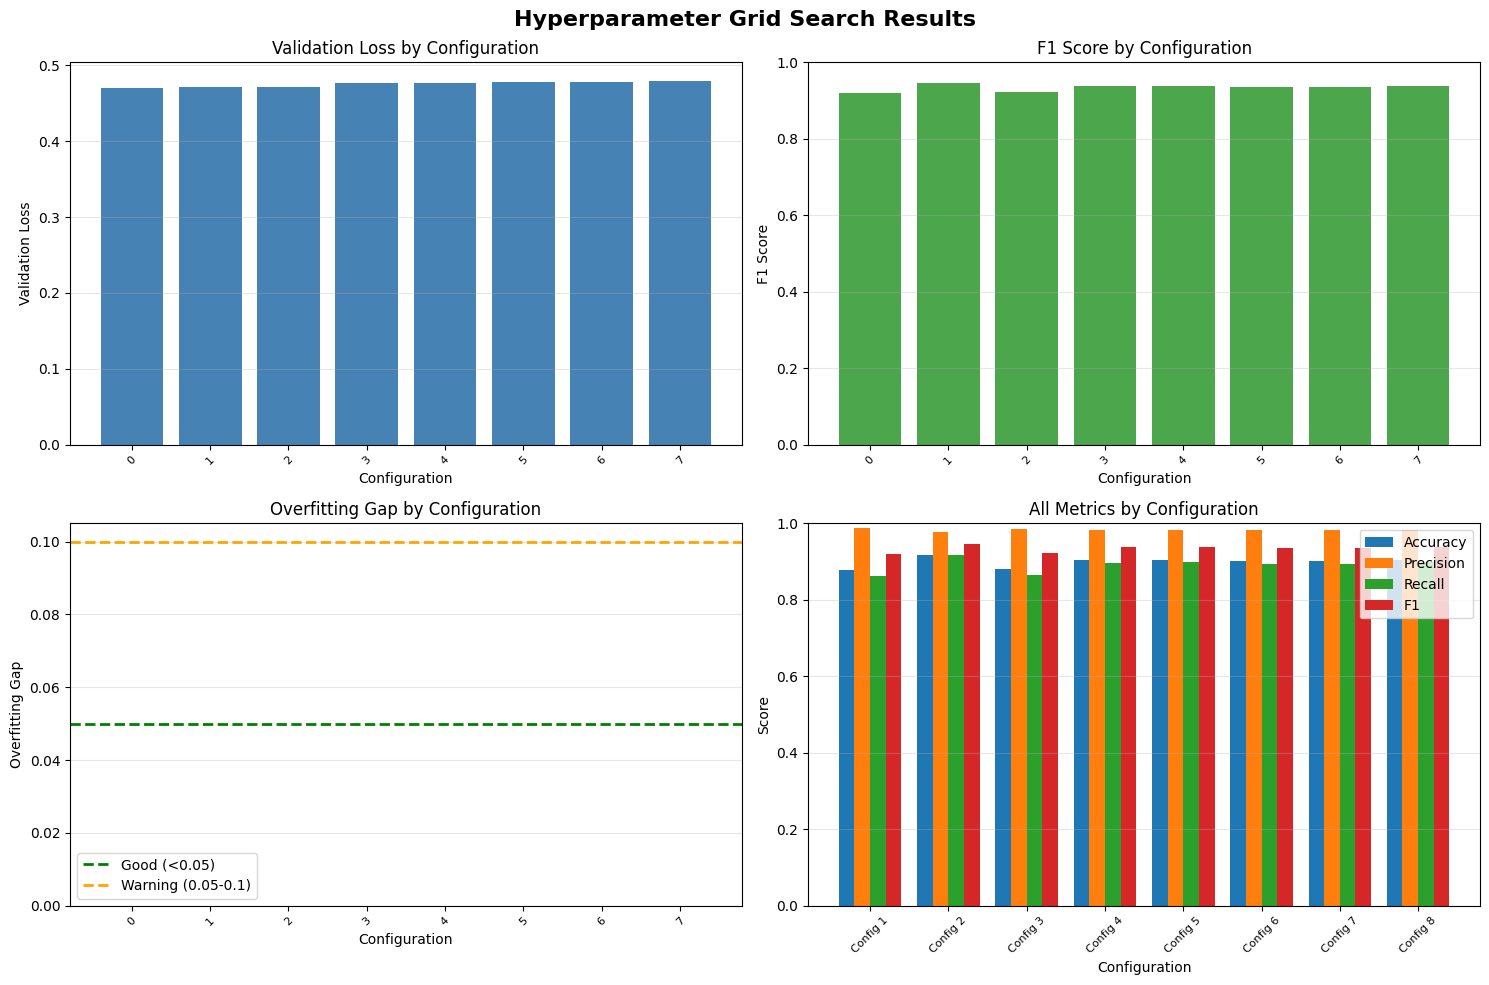


📋 RECOMMENDATIONS:
✓ Overfitting is well controlled!
  → You can use these hyperparameters for final training

🎯 Best configuration to use:
   learning_rate=3e-05
   weight_decay=0.01
   dropout=0.3


In [6]:
import pandas as pd
import re
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    Trainer,
    TrainingArguments
)
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# === Step 1-4: data prep ===
file_path = "/content/Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(file_path)
df = df[["Title", "Review Text", "Recommended IND"]].dropna()

def combine_text(row):
    title = str(row["Title"]).strip()
    review = str(row["Review Text"]).strip()
    return f"{title}. {review}" if title else review

df["text"] = df.apply(combine_text, axis=1)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)

# check for number of sessions available
available_samples = len(df)
print(f"Total available samples: {available_samples}")

if available_samples > 10000:
    sample_size = 8000
elif available_samples > 5000:
    sample_size = min(available_samples, 5000)
else:
    sample_size = min(available_samples, 3000)

print(f"Using {sample_size} samples for training")

df_small = df.sample(sample_size, random_state=42)

train_df, test_df = train_test_split(
    df_small,
    test_size=0.2,
    random_state=42,
    stratify=df_small["Recommended IND"]
)

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# === Tokenization ===
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize_fn(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

print("Tokenizing datasets...")
train_dataset = train_dataset.map(tokenize_fn, batched=True)
test_dataset = test_dataset.map(tokenize_fn, batched=True)

train_dataset = train_dataset.rename_column("Recommended IND", "labels")
test_dataset = test_dataset.rename_column("Recommended IND", "labels")

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# === class weight ===
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0, 1]),
    y=train_df["Recommended IND"]
)
class_weights = torch.tensor(class_weights, dtype=torch.float)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
class_weights = class_weights.to(device)

# === evaluation metrics ===
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# === hyperparameter space ===
hyperparameter_space = {
    'learning_rate': [2e-5, 3e-5],
    'weight_decay': [0.01, 0.05],
    'dropout_prob': [0.3, 0.4],
}

# 2*2*2 = 8 combination

# ===  Trainer ===
class WeightedTrainer(Trainer):
    def __init__(self, label_smoothing=0.1, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.label_smoothing = label_smoothing

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        loss_fct = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=self.label_smoothing)
        loss = loss_fct(logits, labels)

        return (loss, outputs) if return_outputs else loss

# === hyperparameter grid search ===
def train_with_hyperparameters(lr, wd, dropout, label_smoothing=0.1, warmup=0.1):
    """training single combo"""

    try:
        model = DistilBertForSequenceClassification.from_pretrained(
            "distilbert-base-uncased",
            num_labels=2,
            dropout=dropout,
            attention_dropout=dropout
        )
        model.to(device)

        # set up
        training_args = TrainingArguments(
            output_dir=f"./results_lr{lr}_wd{wd}_drop{dropout}",
            eval_strategy="epoch",
            save_strategy="epoch",
            num_train_epochs=3,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            learning_rate=lr,
            weight_decay=wd,
            lr_scheduler_type="cosine",
            warmup_ratio=warmup,
            load_best_model_at_end=True,
            metric_for_best_model="eval_loss",
            greater_is_better=False,
            save_total_limit=1,
            logging_steps=50,
            report_to="none",
            fp16=True,
            max_grad_norm=1.0,
        )

        trainer = WeightedTrainer(
            label_smoothing=label_smoothing,
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=test_dataset,
            tokenizer=tokenizer,
            compute_metrics=compute_metrics
        )

        print(f"  Training started...")
        trainer.train()

        eval_results = trainer.evaluate()

        if 'eval_loss' not in eval_results:
            print(f"  ⚠️  Warning: eval_loss not found in results")
            return None

        # Overfitting
        log_history = trainer.state.log_history
        eval_losses = [entry.get('eval_loss') for entry in log_history if 'eval_loss' in entry]

        if len(eval_losses) == 0:
            print(f"  ⚠️  Warning: No evaluation losses found")
            return None

        min_eval_loss = min(eval_losses)
        final_eval_loss = eval_losses[-1]
        overfitting_gap = final_eval_loss - min_eval_loss

        result = {
            'learning_rate': lr,
            'weight_decay': wd,
            'dropout': dropout,
            'eval_loss': eval_results['eval_loss'],
            'eval_accuracy': eval_results.get('eval_accuracy', 0),
            'eval_f1': eval_results.get('eval_f1', 0),
            'eval_precision': eval_results.get('eval_precision', 0),
            'eval_recall': eval_results.get('eval_recall', 0),
            'min_eval_loss': min_eval_loss,
            'overfitting_gap': overfitting_gap
        }

        return result

    except Exception as e:
        print(f"  ✗ Error during training: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# === Grid search ===
total_combinations = (len(hyperparameter_space['learning_rate']) *
                     len(hyperparameter_space['weight_decay']) *
                     len(hyperparameter_space['dropout_prob']))

print("\n" + "="*70)
print("Starting Hyperparameter Grid Search")
print("="*70)
print(f"Total combinations to try: {total_combinations}")
print(f"Estimated time: ~{total_combinations * 15} minutes on GPU")
print("="*70 + "\n")

results = []
combination_num = 0

for lr, wd, dropout in product(
    hyperparameter_space['learning_rate'],
    hyperparameter_space['weight_decay'],
    hyperparameter_space['dropout_prob']
):
    combination_num += 1
    print(f"\n{'='*70}")
    print(f"Combination {combination_num}/{total_combinations}: LR={lr}, WD={wd}, Dropout={dropout}")
    print(f"{'='*70}")

    result = train_with_hyperparameters(lr, wd, dropout)

    if result is not None:
        results.append(result)

        print(f"\n✓ Results:")
        print(f"  - Eval Loss: {result['eval_loss']:.4f}")
        print(f"  - Eval Accuracy: {result['eval_accuracy']:.4f}")
        print(f"  - Eval F1: {result['eval_f1']:.4f}")
        print(f"  - Overfitting Gap: {result['overfitting_gap']:.4f}")
    else:
        print(f"\n✗ Skipping this combination due to errors")

    if torch.cuda.is_available():
        torch.cuda.empty_cache()

# === check for meaningful results ===
if len(results) == 0:
    print("\n" + "="*70)
    print("❌ ERROR: No successful training runs!")
    print("="*70)
    print("Please check:")
    print("1. Data format is correct")
    print("2. GPU memory is sufficient")
    print("3. All dependencies are installed")
else:
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('eval_loss')

    print("\n" + "="*70)
    print(f"Grid Search Results - {len(results)}/{total_combinations} successful")
    print("="*70)
    print(results_df.to_string(index=False))
    print("="*70)

    # === best hyperparameters ===
    best_result = results_df.iloc[0]
    print("\n" + "="*70)
    print("🏆 BEST HYPERPARAMETERS:")
    print("="*70)
    print(f"Learning Rate: {best_result['learning_rate']}")
    print(f"Weight Decay: {best_result['weight_decay']}")
    print(f"Dropout: {best_result['dropout']}")
    print(f"\nPerformance:")
    print(f"  - Validation Loss: {best_result['eval_loss']:.4f}")
    print(f"  - Accuracy: {best_result['eval_accuracy']:.4f}")
    print(f"  - F1 Score: {best_result['eval_f1']:.4f}")
    print(f"  - Precision: {best_result['eval_precision']:.4f}")
    print(f"  - Recall: {best_result['eval_recall']:.4f}")
    print(f"  - Overfitting Gap: {best_result['overfitting_gap']:.4f}")
    print("="*70)

    # === result visualization ===
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Hyperparameter Grid Search Results', fontsize=16, fontweight='bold')

    # 1. all groups comparison
    x_labels = [f"LR:{r['learning_rate']}\nWD:{r['weight_decay']}\nDrop:{r['dropout']}"
                for _, r in results_df.iterrows()]
    axes[0, 0].bar(range(len(results_df)), results_df['eval_loss'], color='steelblue')
    axes[0, 0].set_xlabel('Configuration')
    axes[0, 0].set_ylabel('Validation Loss')
    axes[0, 0].set_title('Validation Loss by Configuration')
    axes[0, 0].tick_params(axis='x', rotation=45, labelsize=8)
    axes[0, 0].grid(True, alpha=0.3, axis='y')

    # 2. F1 Score
    axes[0, 1].bar(range(len(results_df)), results_df['eval_f1'], color='green', alpha=0.7)
    axes[0, 1].set_xlabel('Configuration')
    axes[0, 1].set_ylabel('F1 Score')
    axes[0, 1].set_title('F1 Score by Configuration')
    axes[0, 1].tick_params(axis='x', rotation=45, labelsize=8)
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    axes[0, 1].set_ylim([0, 1])

    # 3. overfitting
    colors = ['green' if gap < 0.05 else 'orange' if gap < 0.1 else 'red'
              for gap in results_df['overfitting_gap']]
    axes[1, 0].bar(range(len(results_df)), results_df['overfitting_gap'], color=colors)
    axes[1, 0].set_xlabel('Configuration')
    axes[1, 0].set_ylabel('Overfitting Gap')
    axes[1, 0].set_title('Overfitting Gap by Configuration')
    axes[1, 0].axhline(y=0.05, color='green', linestyle='--', label='Good (<0.05)', linewidth=2)
    axes[1, 0].axhline(y=0.1, color='orange', linestyle='--', label='Warning (0.05-0.1)', linewidth=2)
    axes[1, 0].tick_params(axis='x', rotation=45, labelsize=8)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # 4. overall comparison
    metrics_to_plot = ['eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
    x_pos = np.arange(len(results_df))
    width = 0.2

    for i, metric in enumerate(metrics_to_plot):
        axes[1, 1].bar(x_pos + i*width, results_df[metric], width,
                      label=metric.replace('eval_', '').capitalize())

    axes[1, 1].set_xlabel('Configuration')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].set_title('All Metrics by Configuration')
    axes[1, 1].set_xticks(x_pos + width * 1.5)
    axes[1, 1].set_xticklabels([f"Config {i+1}" for i in range(len(results_df))],
                               rotation=45, fontsize=8)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    axes[1, 1].set_ylim([0, 1])

    plt.tight_layout()
    plt.savefig('./hyperparameter_search_results.png', dpi=300, bbox_inches='tight')
    plt.show()

    # # === save to CSV ===
    # results_df.to_csv('./hyperparameter_search_results.csv', index=False)
    # print("\n✓ Results saved to 'hyperparameter_search_results.csv'")
    # print("✓ Visualization saved to 'hyperparameter_search_results.png'")

    # === recommended action ===
    print("\n" + "="*70)
    print("📋 RECOMMENDATIONS:")
    print("="*70)

    if best_result['overfitting_gap'] < 0.05:
        print("✓ Overfitting is well controlled!")
        print("  → You can use these hyperparameters for final training")
    elif best_result['overfitting_gap'] < 0.1:
        print("⚠️  Mild overfitting detected")
        print("  → Consider increasing dropout or weight decay slightly")
    else:
        print("❌ Significant overfitting!")
        print("  → Strongly recommend increasing regularization or reducing epochs")

    print("\n🎯 Best configuration to use:")
    print(f"   learning_rate={best_result['learning_rate']}")
    print(f"   weight_decay={best_result['weight_decay']}")
    print(f"   dropout={best_result['dropout']}")
    print("="*70)

## LoRA parameter grid search

In [1]:
!pip install -q peft

LoRA Hyperparameter Grid Search

Total available samples: 19675
Train size: 6400, Test size: 1600


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]


Tokenizing datasets...


Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Using device: cuda

Grid Search Configuration:
LoRA rank (r): [4, 8]
LoRA alpha: [8, 16]
LoRA dropout: [0.1, 0.2]
Learning rate: [0.0005, 0.001]

Total combinations: 16
Estimated time: ~160 minutes on GPU

Starting LoRA Hyperparameter Grid Search...


Combination 1/16
LoRA r: 4, alpha: 8, dropout: 0.1, LR: 0.0005


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.474900,0.472893,0.894375,0.977196,0.890685,0.931937
2,0.472900,0.461846,0.879375,0.983392,0.866051,0.920999
3,0.430300,0.457858,0.878750,0.985928,0.862972,0.920361
4,0.428000,0.455714,0.892500,0.980392,0.885296,0.930421



✓ Results:
  - Trainable params: 665,858 (0.98%)
  - Training time: 1.53 min
  - Eval Loss: 0.4729
  - Eval Accuracy: 0.8944
  - Eval F1: 0.9319
  - Overfitting Gap: 0.0172

Combination 2/16
LoRA r: 4, alpha: 8, dropout: 0.1, LR: 0.001


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.476900,0.467586,0.898125,0.982173,0.890685,0.934195
2,0.468300,0.461358,0.876250,0.986737,0.859122,0.918519
3,0.413100,0.456760,0.890000,0.984469,0.878368,0.928397
4,0.408100,0.455252,0.901250,0.980623,0.896074,0.936444



✓ Results:
  - Trainable params: 665,858 (0.98%)
  - Training time: 1.30 min
  - Eval Loss: 0.4553
  - Eval Accuracy: 0.9012
  - Eval F1: 0.9364
  - Overfitting Gap: 0.0000

Combination 3/16
LoRA r: 4, alpha: 8, dropout: 0.2, LR: 0.0005


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.472700,0.476734,0.898125,0.977311,0.895304,0.934512
2,0.472900,0.461200,0.875625,0.985009,0.859892,0.918208
3,0.430200,0.457190,0.880625,0.984266,0.866821,0.921817
4,0.429700,0.455363,0.890625,0.981990,0.881447,0.929006



✓ Results:
  - Trainable params: 665,858 (0.98%)
  - Training time: 1.42 min
  - Eval Loss: 0.4767
  - Eval Accuracy: 0.8981
  - Eval F1: 0.9345
  - Overfitting Gap: 0.0214

Combination 4/16
LoRA r: 4, alpha: 8, dropout: 0.2, LR: 0.001


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.475300,0.470984,0.898125,0.978921,0.893764,0.934406
2,0.470600,0.460724,0.878125,0.987633,0.860662,0.919786
3,0.415800,0.455019,0.888125,0.985269,0.875289,0.927028
4,0.410800,0.453130,0.900625,0.982234,0.893764,0.935913



✓ Results:
  - Trainable params: 665,858 (0.98%)
  - Training time: 1.07 min
  - Eval Loss: 0.4531
  - Eval Accuracy: 0.9006
  - Eval F1: 0.9359
  - Overfitting Gap: 0.0000

Combination 5/16
LoRA r: 4, alpha: 16, dropout: 0.1, LR: 0.0005


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.474100,0.467357,0.893125,0.981229,0.885296,0.930797
2,0.469900,0.462296,0.877500,0.982502,0.864511,0.919738
3,0.420600,0.456446,0.886875,0.984402,0.874519,0.926213
4,0.418400,0.454919,0.898125,0.981356,0.891455,0.934248



✓ Results:
  - Trainable params: 665,858 (0.98%)
  - Training time: 1.13 min
  - Eval Loss: 0.4549
  - Eval Accuracy: 0.8981
  - Eval F1: 0.9342
  - Overfitting Gap: 0.0000

Combination 6/16
LoRA r: 4, alpha: 16, dropout: 0.1, LR: 0.001


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.474100,0.472028,0.904375,0.979097,0.901463,0.938677
2,0.466700,0.459213,0.887500,0.985256,0.874519,0.926591
3,0.406100,0.457867,0.892500,0.983691,0.882217,0.930195
4,0.396600,0.458326,0.907500,0.976802,0.907621,0.940942



✓ Results:
  - Trainable params: 665,858 (0.98%)
  - Training time: 1.07 min
  - Eval Loss: 0.4583
  - Eval Accuracy: 0.9075
  - Eval F1: 0.9409
  - Overfitting Gap: 0.0005

Combination 7/16
LoRA r: 4, alpha: 16, dropout: 0.2, LR: 0.0005


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.474400,0.464570,0.888750,0.981943,0.879138,0.927701
2,0.469400,0.463457,0.870625,0.984043,0.854503,0.914710
3,0.421700,0.456550,0.885000,0.985205,0.871440,0.924837
4,0.420000,0.454581,0.896250,0.981308,0.889145,0.932956



✓ Results:
  - Trainable params: 665,858 (0.98%)
  - Training time: 1.08 min
  - Eval Loss: 0.4546
  - Eval Accuracy: 0.8962
  - Eval F1: 0.9330
  - Overfitting Gap: 0.0000

Combination 8/16
LoRA r: 4, alpha: 16, dropout: 0.2, LR: 0.001


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.472300,0.470164,0.903750,0.979883,0.899923,0.938202
2,0.470200,0.460642,0.882500,0.982624,0.870670,0.923265
3,0.406300,0.459205,0.890000,0.981974,0.880677,0.928571
4,0.399600,0.460187,0.906250,0.975973,0.906851,0.940144



✓ Results:
  - Trainable params: 665,858 (0.98%)
  - Training time: 1.08 min
  - Eval Loss: 0.4602
  - Eval Accuracy: 0.9062
  - Eval F1: 0.9401
  - Overfitting Gap: 0.0010

Combination 9/16
LoRA r: 8, alpha: 8, dropout: 0.1, LR: 0.0005


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.471900,0.471249,0.895625,0.978849,0.890685,0.932688
2,0.472900,0.460444,0.873125,0.983245,0.858353,0.916564
3,0.428700,0.456797,0.878750,0.985075,0.863741,0.920427
4,0.428100,0.455051,0.893125,0.982877,0.883757,0.930685



✓ Results:
  - Trainable params: 739,586 (1.09%)
  - Training time: 1.08 min
  - Eval Loss: 0.4712
  - Eval Accuracy: 0.8956
  - Eval F1: 0.9327
  - Overfitting Gap: 0.0162

Combination 10/16
LoRA r: 8, alpha: 8, dropout: 0.1, LR: 0.001


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.475800,0.468703,0.901875,0.980640,0.896844,0.936872
2,0.470700,0.462948,0.876875,0.986749,0.859892,0.918963
3,0.414300,0.455597,0.893125,0.985370,0.881447,0.930516
4,0.409700,0.453932,0.901250,0.979815,0.896844,0.936495



✓ Results:
  - Trainable params: 739,586 (1.09%)
  - Training time: 1.09 min
  - Eval Loss: 0.4687
  - Eval Accuracy: 0.9019
  - Eval F1: 0.9369
  - Overfitting Gap: 0.0148

Combination 11/16
LoRA r: 8, alpha: 8, dropout: 0.2, LR: 0.0005


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.471900,0.470803,0.896250,0.979678,0.890685,0.933065
2,0.472700,0.460732,0.871875,0.983216,0.856813,0.915673
3,0.429600,0.456538,0.879375,0.985088,0.864511,0.920869
4,0.428900,0.454809,0.891875,0.982847,0.882217,0.929817



✓ Results:
  - Trainable params: 739,586 (1.09%)
  - Training time: 1.09 min
  - Eval Loss: 0.4708
  - Eval Accuracy: 0.8962
  - Eval F1: 0.9331
  - Overfitting Gap: 0.0160

Combination 12/16
LoRA r: 8, alpha: 8, dropout: 0.2, LR: 0.001


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.475900,0.468451,0.900625,0.982234,0.893764,0.935913
2,0.470900,0.464723,0.874375,0.987567,0.856043,0.917113
3,0.415100,0.456282,0.890000,0.985307,0.877598,0.928339
4,0.411600,0.454255,0.901250,0.979815,0.896844,0.936495



✓ Results:
  - Trainable params: 739,586 (1.09%)
  - Training time: 1.09 min
  - Eval Loss: 0.4543
  - Eval Accuracy: 0.9012
  - Eval F1: 0.9365
  - Overfitting Gap: 0.0000

Combination 13/16
LoRA r: 8, alpha: 16, dropout: 0.1, LR: 0.0005


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.474000,0.467102,0.896875,0.981324,0.889915,0.933387
2,0.469800,0.458895,0.878125,0.983363,0.864511,0.920115
3,0.420900,0.455283,0.885000,0.984361,0.872209,0.924898
4,0.417700,0.453277,0.900000,0.983036,0.892225,0.935432



✓ Results:
  - Trainable params: 739,586 (1.09%)
  - Training time: 1.08 min
  - Eval Loss: 0.4533
  - Eval Accuracy: 0.9000
  - Eval F1: 0.9354
  - Overfitting Gap: 0.0000

Combination 14/16
LoRA r: 8, alpha: 16, dropout: 0.1, LR: 0.001


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.475800,0.467061,0.900000,0.980591,0.894534,0.935588
2,0.470300,0.464052,0.887500,0.988646,0.871440,0.926350
3,0.408100,0.457687,0.888750,0.983607,0.877598,0.927583
4,0.399000,0.460301,0.907500,0.979184,0.905312,0.940800



✓ Results:
  - Trainable params: 739,586 (1.09%)
  - Training time: 1.09 min
  - Eval Loss: 0.4603
  - Eval Accuracy: 0.9075
  - Eval F1: 0.9408
  - Overfitting Gap: 0.0026

Combination 15/16
LoRA r: 8, alpha: 16, dropout: 0.2, LR: 0.0005


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.474600,0.469091,0.898125,0.981356,0.891455,0.934248
2,0.469900,0.459939,0.877500,0.984197,0.862972,0.919606
3,0.421500,0.456578,0.884375,0.984348,0.871440,0.924459
4,0.418900,0.454147,0.898750,0.983008,0.890685,0.934572



✓ Results:
  - Trainable params: 739,586 (1.09%)
  - Training time: 1.09 min
  - Eval Loss: 0.4541
  - Eval Accuracy: 0.8988
  - Eval F1: 0.9346
  - Overfitting Gap: 0.0000

Combination 16/16
LoRA r: 8, alpha: 16, dropout: 0.2, LR: 0.001


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.475500,0.464865,0.897500,0.980525,0.891455,0.933871
2,0.470100,0.465914,0.875625,0.990196,0.855273,0.917803
3,0.407000,0.455579,0.891250,0.982833,0.881447,0.929383
4,0.399300,0.458548,0.906875,0.978369,0.905312,0.940424



✓ Results:
  - Trainable params: 739,586 (1.09%)
  - Training time: 1.09 min
  - Eval Loss: 0.4585
  - Eval Accuracy: 0.9069
  - Eval F1: 0.9404
  - Overfitting Gap: 0.0030

Grid Search Results - 16/16 successful
Total time: 19.04 minutes

Top 10 Configurations by F1 Score:
 lora_r  lora_alpha  lora_dropout  learning_rate  eval_f1  eval_accuracy  eval_loss  overfitting_gap  trainable_percentage  training_time
      4          16           0.1         0.0010 0.940942       0.907500   0.458326         0.000460              0.984693      64.415830
      8          16           0.1         0.0010 0.940800       0.907500   0.460301         0.002614              1.092533      65.180788
      8          16           0.2         0.0010 0.940424       0.906875   0.458548         0.002968              1.092533      65.134902
      4          16           0.2         0.0010 0.940144       0.906250   0.460187         0.000983              0.984693      64.628635
      8           8           0.1 

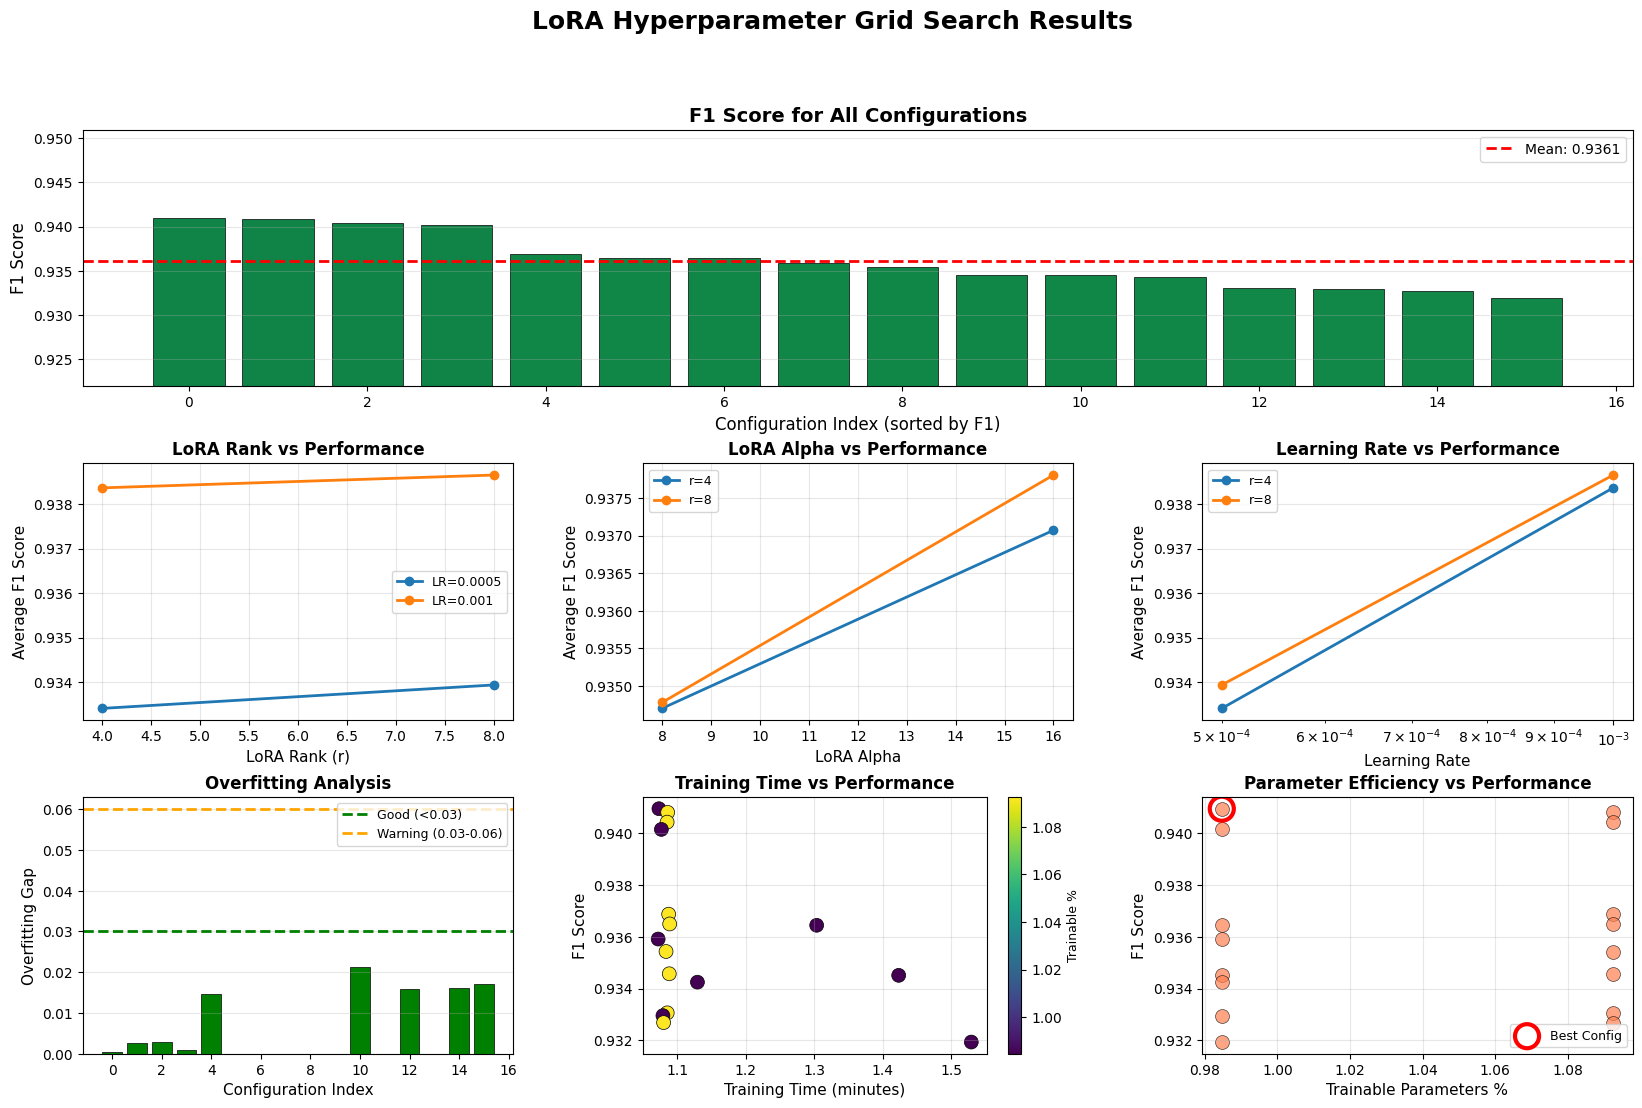


✓ Visualization saved to './lora_grid_search_results.png'
✓ Results saved to './lora_grid_search_results.csv'

📊 KEY INSIGHTS:

1. Best LoRA Rank: r=8 (Avg F1: 0.9363)
2. Best LoRA Alpha: α=16 (Avg F1: 0.9374)
3. Best Learning Rate: 0.001 (Avg F1: 0.9385)

4. Parameter Efficiency:
   - Average trainable params: 1.04%
   - Best model trainable params: 0.98%

5. Overfitting Analysis:
   - Configurations with good control: 16/16
   - Configurations with overfitting: 0/16

6. Training Efficiency:
   - Average training time: 1.15 minutes
   - Best model training time: 1.07 minutes

💡 RECOMMENDATIONS:
✓ Best configuration shows excellent generalization!

🎯 Use these hyperparameters for final LoRA training:

lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    r=4,
    lora_alpha=16,
    lora_dropout=0.1,
    target_modules=["q_lin", "v_lin"],
)

training_args = TrainingArguments(
    learning_rate=0.001,
    # ... other parameters
)


🎉 LoRA Grid Search Complete!


In [4]:
import pandas as pd
import re
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    Trainer,
    TrainingArguments
)
from peft import LoraConfig, get_peft_model, TaskType
import matplotlib.pyplot as plt
from itertools import product
import time
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("LoRA Hyperparameter Grid Search")
print("="*70)

# === Step 1: data prep ===
file_path = "/content/Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(file_path)
df = df[["Title", "Review Text", "Recommended IND"]].dropna()

def combine_text(row):
    title = str(row["Title"]).strip()
    review = str(row["Review Text"]).strip()
    return f"{title}. {review}" if title else review

df["text"] = df.apply(combine_text, axis=1)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)

print(f"\nTotal available samples: {len(df)}")

df_small = df.sample(8000, random_state=42)

train_df, test_df = train_test_split(
    df_small,
    test_size=0.2,
    random_state=42,
    stratify=df_small["Recommended IND"]
)

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# === Step 2: Tokenization ===
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize_fn(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

print("\nTokenizing datasets...")
train_dataset = train_dataset.map(tokenize_fn, batched=True)
test_dataset = test_dataset.map(tokenize_fn, batched=True)

train_dataset = train_dataset.rename_column("Recommended IND", "labels")
test_dataset = test_dataset.rename_column("Recommended IND", "labels")

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# === Step 3: class weight ===
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0, 1]),
    y=train_df["Recommended IND"]
)
class_weights = torch.tensor(class_weights, dtype=torch.float)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
class_weights = class_weights.to(device)

# === Step 4: evaluation metrics ===
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# === Step 5: LoRA hyperparameters grid search ===
hyperparameter_space = {
    'lora_r': [4, 8],                    # LoRA rank
    'lora_alpha': [8, 16],               # LoRA alpha
    'lora_dropout': [0.1, 0.2],              # LoRA dropout
    'learning_rate': [5e-4, 1e-3],
}

total_combinations = (len(hyperparameter_space['lora_r']) *
                     len(hyperparameter_space['lora_alpha']) *
                     len(hyperparameter_space['lora_dropout']) *
                     len(hyperparameter_space['learning_rate']))

print("\n" + "="*70)
print("Grid Search Configuration:")
print("="*70)
print(f"LoRA rank (r): {hyperparameter_space['lora_r']}")
print(f"LoRA alpha: {hyperparameter_space['lora_alpha']}")
print(f"LoRA dropout: {hyperparameter_space['lora_dropout']}")
print(f"Learning rate: {hyperparameter_space['learning_rate']}")
print(f"\nTotal combinations: {total_combinations}")
print(f"Estimated time: ~{total_combinations * 10} minutes on GPU")
print("="*70)

# === Step 6: Trainer ===
class WeightedLoRATrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        loss_fct = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)
        loss = loss_fct(logits, labels)

        return (loss, outputs) if return_outputs else loss

def train_with_lora_config(lora_r, lora_alpha, lora_dropout, learning_rate):
    """使用特定的LoRA配置训练模型"""

    try:
        base_model = DistilBertForSequenceClassification.from_pretrained(
            "distilbert-base-uncased",
            num_labels=2
        )

        lora_config = LoraConfig(
            task_type=TaskType.SEQ_CLS,
            r=lora_r,
            lora_alpha=lora_alpha,
            lora_dropout=lora_dropout,
            target_modules=["q_lin", "v_lin"],
            bias="none",
            inference_mode=False,
        )

        model = get_peft_model(base_model, lora_config)
        model.to(device)

        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        all_params = sum(p.numel() for p in model.parameters())
        trainable_percentage = 100 * trainable_params / all_params

        training_args = TrainingArguments(
            output_dir=f"./results_lora_r{lora_r}_alpha{lora_alpha}_drop{lora_dropout}_lr{learning_rate}",
            eval_strategy="epoch",
            save_strategy="epoch",
            num_train_epochs=4,
            per_device_train_batch_size=32,
            per_device_eval_batch_size=32,
            learning_rate=learning_rate,
            weight_decay=0.01,
            lr_scheduler_type="cosine",
            warmup_ratio=0.1,
            load_best_model_at_end=True,
            metric_for_best_model="f1",
            greater_is_better=True,
            save_total_limit=1,
            logging_steps=50,
            report_to="none",
            fp16=True,
            max_grad_norm=1.0,
        )

        trainer = WeightedLoRATrainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=test_dataset,
            tokenizer=tokenizer,
            compute_metrics=compute_metrics
        )

        start_time = time.time()
        trainer.train()
        training_time = time.time() - start_time

        # evaluation
        eval_results = trainer.evaluate()

        # overfitting evaluation
        log_history = trainer.state.log_history
        eval_losses = [entry.get('eval_loss') for entry in log_history if 'eval_loss' in entry]

        if len(eval_losses) == 0:
            print(f"  ⚠️  Warning: No evaluation losses found")
            return None

        min_eval_loss = min(eval_losses)
        final_eval_loss = eval_losses[-1]
        overfitting_gap = final_eval_loss - min_eval_loss

        # save results to table
        result = {
            'lora_r': lora_r,
            'lora_alpha': lora_alpha,
            'lora_dropout': lora_dropout,
            'learning_rate': learning_rate,
            'eval_loss': eval_results['eval_loss'],
            'eval_accuracy': eval_results.get('eval_accuracy', 0),
            'eval_f1': eval_results.get('eval_f1', 0),
            'eval_precision': eval_results.get('eval_precision', 0),
            'eval_recall': eval_results.get('eval_recall', 0),
            'min_eval_loss': min_eval_loss,
            'overfitting_gap': overfitting_gap,
            'trainable_params': trainable_params,
            'trainable_percentage': trainable_percentage,
            'training_time': training_time,
        }

        return result

    except Exception as e:
        print(f"  ✗ Error during training: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# Grid search 16 combinations
print("\n" + "="*70)
print("Starting LoRA Hyperparameter Grid Search...")
print("="*70 + "\n")

results = []
combination_num = 0
total_start_time = time.time()

for lora_r, lora_alpha, lora_dropout, lr in product(
    hyperparameter_space['lora_r'],
    hyperparameter_space['lora_alpha'],
    hyperparameter_space['lora_dropout'],
    hyperparameter_space['learning_rate']
):
    combination_num += 1

    print(f"\n{'='*70}")
    print(f"Combination {combination_num}/{total_combinations}")
    print(f"{'='*70}")
    print(f"LoRA r: {lora_r}, alpha: {lora_alpha}, dropout: {lora_dropout}, LR: {lr}")
    print(f"{'='*70}")

    result = train_with_lora_config(lora_r, lora_alpha, lora_dropout, lr)

    if result is not None:
        results.append(result)

        print(f"\n✓ Results:")
        print(f"  - Trainable params: {result['trainable_params']:,} ({result['trainable_percentage']:.2f}%)")
        print(f"  - Training time: {result['training_time']/60:.2f} min")
        print(f"  - Eval Loss: {result['eval_loss']:.4f}")
        print(f"  - Eval Accuracy: {result['eval_accuracy']:.4f}")
        print(f"  - Eval F1: {result['eval_f1']:.4f}")
        print(f"  - Overfitting Gap: {result['overfitting_gap']:.4f}")
    else:
        print(f"\n✗ Skipping this combination due to errors")

    if torch.cuda.is_available():
        torch.cuda.empty_cache()

total_time = time.time() - total_start_time

# Result analysis
if len(results) == 0:
    print("\n" + "="*70)
    print("❌ ERROR: No successful training runs!")
    print("="*70)
else:
    results_df = pd.DataFrame(results)

    results_df = results_df.sort_values('eval_f1', ascending=False)

    print("\n" + "="*70)
    print(f"Grid Search Results - {len(results)}/{total_combinations} successful")
    print(f"Total time: {total_time/60:.2f} minutes")
    print("="*70)

    print("\nTop 10 Configurations by F1 Score:")
    print("="*70)
    display_cols = ['lora_r', 'lora_alpha', 'lora_dropout', 'learning_rate',
                   'eval_f1', 'eval_accuracy', 'eval_loss', 'overfitting_gap',
                   'trainable_percentage', 'training_time']
    print(results_df[display_cols].head(10).to_string(index=False))

    # Best config
    best_result = results_df.iloc[0]

    print("\n" + "="*70)
    print("🏆 BEST LoRA CONFIGURATION:")
    print("="*70)
    print(f"LoRA Rank (r): {best_result['lora_r']}")
    print(f"LoRA Alpha: {best_result['lora_alpha']}")
    print(f"LoRA Dropout: {best_result['lora_dropout']}")
    print(f"Learning Rate: {best_result['learning_rate']}")
    print(f"\nModel Efficiency:")
    print(f"  - Trainable params: {int(best_result['trainable_params']):,} ({best_result['trainable_percentage']:.2f}%)")
    print(f"  - Training time: {best_result['training_time']/60:.2f} minutes")
    print(f"\nPerformance:")
    print(f"  - Validation Loss: {best_result['eval_loss']:.4f}")
    print(f"  - Accuracy: {best_result['eval_accuracy']:.4f}")
    print(f"  - F1 Score: {best_result['eval_f1']:.4f}")
    print(f"  - Precision: {best_result['eval_precision']:.4f}")
    print(f"  - Recall: {best_result['eval_recall']:.4f}")
    print(f"  - Overfitting Gap: {best_result['overfitting_gap']:.4f}")
    print("="*70)

    # visualization of result
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    fig.suptitle('LoRA Hyperparameter Grid Search Results', fontsize=18, fontweight='bold')

    # 1. F1 Score
    ax1 = fig.add_subplot(gs[0, :])
    x_pos = range(len(results_df))
    colors = plt.cm.RdYlGn(results_df['eval_f1'])
    bars = ax1.bar(x_pos, results_df['eval_f1'], color=colors, edgecolor='black', linewidth=0.5)
    ax1.set_xlabel('Configuration Index (sorted by F1)', fontsize=12)
    ax1.set_ylabel('F1 Score', fontsize=12)
    ax1.set_title('F1 Score for All Configurations', fontsize=14, fontweight='bold')
    ax1.axhline(y=results_df['eval_f1'].mean(), color='r', linestyle='--',
                label=f'Mean: {results_df["eval_f1"].mean():.4f}', linewidth=2)
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_ylim([results_df['eval_f1'].min() - 0.01, results_df['eval_f1'].max() + 0.01])

    # 2. LoRA Rank
    ax2 = fig.add_subplot(gs[1, 0])
    for lr in hyperparameter_space['learning_rate']:
        subset = results_df[results_df['learning_rate'] == lr]
        if len(subset) > 0:
            grouped = subset.groupby('lora_r')['eval_f1'].mean()
            ax2.plot(grouped.index, grouped.values, marker='o', label=f'LR={lr}', linewidth=2)
    ax2.set_xlabel('LoRA Rank (r)', fontsize=11)
    ax2.set_ylabel('Average F1 Score', fontsize=11)
    ax2.set_title('LoRA Rank vs Performance', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3)

    # 3. LoRA Alpha
    ax3 = fig.add_subplot(gs[1, 1])
    for r in hyperparameter_space['lora_r']:
        subset = results_df[results_df['lora_r'] == r]
        if len(subset) > 0:
            grouped = subset.groupby('lora_alpha')['eval_f1'].mean()
            ax3.plot(grouped.index, grouped.values, marker='o', label=f'r={r}', linewidth=2)
    ax3.set_xlabel('LoRA Alpha', fontsize=11)
    ax3.set_ylabel('Average F1 Score', fontsize=11)
    ax3.set_title('LoRA Alpha vs Performance', fontsize=12, fontweight='bold')
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3)

    # 4. Learning Rate
    ax4 = fig.add_subplot(gs[1, 2])
    for r in hyperparameter_space['lora_r']:
        subset = results_df[results_df['lora_r'] == r]
        if len(subset) > 0:
            grouped = subset.groupby('learning_rate')['eval_f1'].mean()
            ax4.plot(grouped.index, grouped.values, marker='o', label=f'r={r}', linewidth=2)
    ax4.set_xlabel('Learning Rate', fontsize=11)
    ax4.set_ylabel('Average F1 Score', fontsize=11)
    ax4.set_title('Learning Rate vs Performance', fontsize=12, fontweight='bold')
    ax4.legend(fontsize=9)
    ax4.grid(True, alpha=0.3)
    ax4.set_xscale('log')

    # 5. Overfitting Analysis
    ax5 = fig.add_subplot(gs[2, 0])
    colors_overfit = ['green' if gap < 0.03 else 'orange' if gap < 0.06 else 'red'
                      for gap in results_df['overfitting_gap']]
    ax5.bar(range(len(results_df)), results_df['overfitting_gap'], color=colors_overfit,
            edgecolor='black', linewidth=0.5)
    ax5.set_xlabel('Configuration Index', fontsize=11)
    ax5.set_ylabel('Overfitting Gap', fontsize=11)
    ax5.set_title('Overfitting Analysis', fontsize=12, fontweight='bold')
    ax5.axhline(y=0.03, color='green', linestyle='--', label='Good (<0.03)', linewidth=2)
    ax5.axhline(y=0.06, color='orange', linestyle='--', label='Warning (0.03-0.06)', linewidth=2)
    ax5.legend(fontsize=9)
    ax5.grid(True, alpha=0.3, axis='y')

    # 6. Training Time
    ax6 = fig.add_subplot(gs[2, 1])
    scatter = ax6.scatter(results_df['training_time']/60, results_df['eval_f1'],
                         c=results_df['trainable_percentage'], s=100,
                         cmap='viridis', edgecolor='black', linewidth=0.5)
    ax6.set_xlabel('Training Time (minutes)', fontsize=11)
    ax6.set_ylabel('F1 Score', fontsize=11)
    ax6.set_title('Training Time vs Performance', fontsize=12, fontweight='bold')
    cbar = plt.colorbar(scatter, ax=ax6)
    cbar.set_label('Trainable %', fontsize=9)
    ax6.grid(True, alpha=0.3)

    # 7. Parameter Efficiency
    ax7 = fig.add_subplot(gs[2, 2])
    ax7.scatter(results_df['trainable_percentage'], results_df['eval_f1'],
               s=100, c='coral', edgecolor='black', linewidth=0.5, alpha=0.7)
    ax7.set_xlabel('Trainable Parameters %', fontsize=11)
    ax7.set_ylabel('F1 Score', fontsize=11)
    ax7.set_title('Parameter Efficiency vs Performance', fontsize=12, fontweight='bold')
    ax7.grid(True, alpha=0.3)

    best_idx = results_df.index[0]
    ax7.scatter(results_df.loc[best_idx, 'trainable_percentage'],
               results_df.loc[best_idx, 'eval_f1'],
               s=300, facecolors='none', edgecolors='red', linewidth=3,
               label='Best Config')
    ax7.legend(fontsize=9)

    plt.savefig('./lora_grid_search_results.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n✓ Visualization saved to './lora_grid_search_results.png'")

    # === Step 13: 保存结果 ===
    results_df.to_csv('./lora_grid_search_results.csv', index=False)
    print("✓ Results saved to './lora_grid_search_results.csv'")

    # === Step 14: 洞察分析 ===
    print("\n" + "="*70)
    print("📊 KEY INSIGHTS:")
    print("="*70)

    # 最佳rank
    best_r_df = results_df.groupby('lora_r')['eval_f1'].mean().sort_values(ascending=False)
    print(f"\n1. Best LoRA Rank: r={best_r_df.index[0]} (Avg F1: {best_r_df.values[0]:.4f})")

    # 最佳alpha
    best_alpha_df = results_df.groupby('lora_alpha')['eval_f1'].mean().sort_values(ascending=False)
    print(f"2. Best LoRA Alpha: α={best_alpha_df.index[0]} (Avg F1: {best_alpha_df.values[0]:.4f})")

    # 最佳学习率
    best_lr_df = results_df.groupby('learning_rate')['eval_f1'].mean().sort_values(ascending=False)
    print(f"3. Best Learning Rate: {best_lr_df.index[0]} (Avg F1: {best_lr_df.values[0]:.4f})")

    # 参数效率
    print(f"\n4. Parameter Efficiency:")
    print(f"   - Average trainable params: {results_df['trainable_percentage'].mean():.2f}%")
    print(f"   - Best model trainable params: {best_result['trainable_percentage']:.2f}%")

    # 过拟合情况
    overfit_count = len(results_df[results_df['overfitting_gap'] > 0.06])
    print(f"\n5. Overfitting Analysis:")
    print(f"   - Configurations with good control: {len(results_df[results_df['overfitting_gap'] < 0.03])}/{len(results_df)}")
    print(f"   - Configurations with overfitting: {overfit_count}/{len(results_df)}")

    # 训练效率
    avg_time = results_df['training_time'].mean() / 60
    best_time = best_result['training_time'] / 60
    print(f"\n6. Training Efficiency:")
    print(f"   - Average training time: {avg_time:.2f} minutes")
    print(f"   - Best model training time: {best_time:.2f} minutes")

    print("="*70)

    # === Step 15: recommended params ===
    print("\n" + "="*70)
    print("💡 RECOMMENDATIONS:")
    print("="*70)

    if best_result['overfitting_gap'] < 0.03:
        print("✓ Best configuration shows excellent generalization!")
    elif best_result['overfitting_gap'] < 0.06:
        print("⚠️  Best configuration has mild overfitting")
        print("  → Consider slightly increasing dropout or reducing epochs")
    else:
        print("❌ Best configuration has significant overfitting")
        print("  → Recommend using a configuration with better overfitting control")

        # Best
        good_configs = results_df[results_df['overfitting_gap'] < 0.03]
        if len(good_configs) > 0:
            alt_best = good_configs.iloc[0]
            print(f"\n  Alternative recommendation (better overfitting control):")
            print(f"    r={alt_best['lora_r']}, alpha={alt_best['lora_alpha']}, "
                  f"dropout={alt_best['lora_dropout']}, lr={alt_best['learning_rate']}")
            print(f"    F1: {alt_best['eval_f1']:.4f}, Overfitting gap: {alt_best['overfitting_gap']:.4f}")

    print("\n🎯 Use these hyperparameters for final LoRA training:")
    print(f"""
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    r={int(best_result['lora_r'])},
    lora_alpha={int(best_result['lora_alpha'])},
    lora_dropout={best_result['lora_dropout']},
    target_modules=["q_lin", "v_lin"],
)

training_args = TrainingArguments(
    learning_rate={best_result['learning_rate']},
    # ... other parameters
)
""")
    print("="*70)

print("\n🎉 LoRA Grid Search Complete!")